# Young People Survey - Explore the preferences, interests, habits, opinions, and fears of young people

## Information about this notebook
### Source
This notebook aims to explore, gain insights, and solve the problems related to the data in the following source:
- https://www.kaggle.com/miroslavsabo/young-people-survey

### References
The content of this notebook is based on knowledge gained from the following resources:
- https://www.kaggle.com/jkokatjuhha/we-are-from-our-childhood
- https://www.kaggle.com/mikesch/who-are-the-money-savers

### Data
This notebook depends on the following data files:
- columns.csv
- responses.csv

### Imports
This notebook depends on the following libraries:

In [1]:
from sklearn.impute import SimpleImputer
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

### Settings
This notebook uses the following settings:

In [2]:
# Block warnings
warnings.filterwarnings('ignore')

# Show math plots inline
%matplotlib inline

### Status
- The content of this notebook mainly follows the lines of the reference given above.

## Table of Content
- <a href='#intro'>1. Introduction</a>
- <a href='#data'>2. The Data</a>
- <a href='#res_tech'>3. Research Techniques</a>
- <a href='#eda'>4. Exploratory Data Analysis</a>

<a id='intro'></a>
## 1. Introduction

In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.

- The data file (responses.csv) consists of 1010 rows and 150 columns (139 integer and 11 categorical). 
- For convenience, the original variable names were shortened in the data file. See the columns.csv file if you want to match the data with the original names.
- The data contain missing values.
- The survey was presented to participants in both electronic and written form.
- The original questionnaire was in Slovak language and was later translated into English.
- All participants were of Slovakian nationality, aged between 15-30.

In section <a href='#data'>2.</a> we make an overview of the data. We do this by looking at the different categories, the questions in each category, and the respective input values for those questions. In section <a href='#res_tech'>3.</a> we will discuss some different research techniques that we can use on this type of data. In section <a href='#eda'>4.</a> we'll start to explore amd clean the data such that it is ready to be handles by different typer of ML algorithms in section <a href='#ml'>5.</a>

<a id='data'></a>
## 2. The Data

The features in this dataset can be split into the following groups:

- **Music preferences** (19 items)
- **Movie preferences** (12 items)
- **Hobbies & interests** (32 items)
- **Phobias** (10 items)
- **Health habits** (3 items)
- **Personality traits, views on life, & opinions** (57 items)
- **Spending habits** (7 items)
- **Demographics** (10 items)

Where:
- MUSIC PREFERENCES
    - I enjoy listening to music.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I prefer.: Slow paced music 1-2-3-4-5 Fast paced music (integer)
    - Dance, Disco, Funk: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Folk music: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Country: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Classical: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Musicals: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Pop: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Rock: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Metal, Hard rock: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Punk: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Hip hop, Rap: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Reggae, Ska: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Swing, Jazz: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Rock n Roll: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Alternative music: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Latin: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Techno, Trance: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Opera: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
- MOVIE PREFERENCES
    - I really enjoy watching movies.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - Horror movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Thriller movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Comedies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Romantic movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Sci-fi movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - War movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Tales: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Cartoons: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Documentaries: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Western movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
    - Action movies: Don't enjoy at all 1-2-3-4-5 Enjoy very much (integer)
- HOBBIES & INTERESTS
    - History: Not interested 1-2-3-4-5 Very interested (integer)
    - Psychology: Not interested 1-2-3-4-5 Very interested (integer)
    - Politics: Not interested 1-2-3-4-5 Very interested (integer)
    - Mathematics: Not interested 1-2-3-4-5 Very interested (integer)
    - Physics: Not interested 1-2-3-4-5 Very interested (integer)
    - Internet: Not interested 1-2-3-4-5 Very interested (integer)
    - PC Software, Hardware: Not interested 1-2-3-4-5 Very interested (integer)
    - Economy, Management: Not interested 1-2-3-4-5 Very interested (integer)
    - Biology: Not interested 1-2-3-4-5 Very interested (integer)
    - Chemistry: Not interested 1-2-3-4-5 Very interested (integer)
    - Poetry reading: Not interested 1-2-3-4-5 Very interested (integer)
    - Geography: Not interested 1-2-3-4-5 Very interested (integer)
    - Foreign languages: Not interested 1-2-3-4-5 Very interested (integer)
    - Medicine: Not interested 1-2-3-4-5 Very interested (integer)
    - Law: Not interested 1-2-3-4-5 Very interested (integer)
    - Cars: Not interested 1-2-3-4-5 Very interested (integer)
    - Art: Not interested 1-2-3-4-5 Very interested (integer)
    - Religion: Not interested 1-2-3-4-5 Very interested (integer)
    - Outdoor activities: Not interested 1-2-3-4-5 Very interested (integer)
    - Dancing: Not interested 1-2-3-4-5 Very interested (integer)
    - Playing musical instruments: Not interested 1-2-3-4-5 Very interested (integer)
    - Poetry writing: Not interested 1-2-3-4-5 Very interested (integer)
    - Sport and leisure activities: Not interested 1-2-3-4-5 Very interested (integer)
    - Sport at competitive level: Not interested 1-2-3-4-5 Very interested (integer)
    - Gardening: Not interested 1-2-3-4-5 Very interested (integer)
    - Celebrity lifestyle: Not interested 1-2-3-4-5 Very interested (integer)
    - Shopping: Not interested 1-2-3-4-5 Very interested (integer)
    - Science and technology: Not interested 1-2-3-4-5 Very interested (integer)
    - Theatre: Not interested 1-2-3-4-5 Very interested (integer)
    - Socializing: Not interested 1-2-3-4-5 Very interested (integer)
    - Adrenaline sports: Not interested 1-2-3-4-5 Very interested (integer)
    - Pets: Not interested 1-2-3-4-5 Very interested (integer)
- PHOBIAS
    - Flying: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Thunder, lightning: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Darkness: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Heights: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Spiders: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Snakes: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Rats, mice: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Ageing: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Dangerous dogs: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
    - Public speaking: Not afraid at all 1-2-3-4-5 Very afraid of (integer)
- HEALTH HABITS
    - Smoking habits: Never smoked - Tried smoking - Former smoker - Current smoker (categorical)
    - Drinking: Never - Social drinker - Drink a lot (categorical)
    - I live a very healthy lifestyle.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- PERSONALITY TRAITS, VIEWS ON LIFE & OPINIONS
    - I take notice of what goes on around me.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I try to do tasks as soon as possible and not leave them until last minute.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always make a list so I don't forget anything.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I often study or work even in my spare time.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I look at things from all different angles before I go ahead.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I believe that bad people will suffer one day and good people will be rewarded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I am reliable at work and always complete all tasks given to me.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always keep my promises.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I can fall for someone very quickly and then completely lose interest.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I would rather have lots of friends than lots of money.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always try to be the funniest one.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I can be two faced sometimes.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I damaged things in the past when angry.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I take my time to make decisions.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always try to vote in elections.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I often think about and regret the decisions I make.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I can tell if people listen to me or not when I talk to them.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I am a hypochondriac.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I am emphatetic person.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I eat because I have to. I don't enjoy food and eat as fast as I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I try to give as much as I can to other people at Christmas.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I don't like seeing animals suffering.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I look after things I have borrowed from others.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I feel lonely in life.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I used to cheat at school.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I worry about my health.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I wish I could change the past because of the things I have done.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I believe in God.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always have good dreams.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always give to charity.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I have lots of friends.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - Timekeeping.: I am often early. - I am always on time. - I am often running late. (categorical)
    - Do you lie to others?: Never. - Only to avoid hurting someone. - Sometimes. - Everytime it suits me. (categorical)
    - I am very patient.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I can quickly adapt to a new environment.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - My moods change quickly.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I am well mannered and I look after my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I enjoy meeting new people.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always let other people know about my achievements.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I think carefully before answering any important letters.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I enjoy childrens' company.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I am not afraid to give my opinion if I feel strongly about something.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I can get angry very easily.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always make sure I connect with the right people.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I have to be well prepared before public speaking.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I will find a fault in myself if people don't like me.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I cry when I feel down or things don't go the right way.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I am 100% happy with my life.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I am always full of life and energy.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I prefer big dangerous dogs to smaller, calmer dogs.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I believe all my personality traits are positive.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - If I find something the doesn't belong to me I will hand it in.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I find it very difficult to get up in the morning.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I have many different hobbies and interests.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I always listen to my parents' advice.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I enjoy taking part in surveys.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - How much time do you spend online?: No time at all - Less than an hour a day - Few hours a day - Most of the day (categorical)
- SPENDING HABITS
    - I save all the money I can.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I enjoy going to large shopping centres.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I prefer branded clothing to non branded.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I spend a lot of money on partying and socializing.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I spend a lot of money on my appearance.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I spend a lot of money on gadgets.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
    - I will hapilly pay more money for good, quality or healthy food.: Strongly disagree 1-2-3-4-5 Strongly agree (integer)
- DEMOGRAPHICS
    - Age: (integer)
    - Height: (integer)
    - Weight: (integer)
    - How many siblings do you have?: (integer)
    - Gender: Female - Male (categorical)
    - I am: Left handed - Right handed (categorical)
    - Highest education achieved: Currently a Primary school pupil - Primary school - Secondary school - College/Bachelor degree (categorical)
    - I am the only child: No - Yes (categorical)
    - I spent most of my childhood in a: City - village (categorical)
    - I lived most of my childhood in a: house/bungalow - block of flats (categorical)

<a id='res_tech'></a>
## 3. Research Techniques

Many different techniques can be used to answer many questions, e.g.

- **Clustering**: Given the music preferences, do people make up any clusters of similar behavior?
- **Hypothesis testing**: Do women fear certain phenomena significantly more than men? Do the left handed people have different interests than right handed?
- **Predictive modeling**: Can we predict spending habits of a person from his/her interests and movie or music preferences?
- **Dimension reduction**: Can we describe a large number of human interests by a smaller number of latent concepts?
- **Correlation analysis**: Are there any connections between music and movie preferences?
- **Visualization**: How to effectively visualize a lot of variables in order to gain some meaningful insights from the data?
- **(Multivariate) Outlier detection**: Small number of participants often cheats and randomly answers the questions. Can you identify them? Hint: Local outlier factor may help.
- **Missing values analysis**: Are there any patterns in missing responses? What is the optimal way of imputing the values in surveys?
- **Recommendations**: If some of user's interests are known, can we predict the other? Or, if we know what a person listen, can we predict which kind of movies he/she might like?


Things to study:
- Personality vs only child

<a id='eda'></a>
## 4. Exploratory Data Analysis

We start off by importing and diplaying some information about the data.

In [3]:
# Load data
df = pd.read_csv('responses.csv')
df_ = df.copy() # TODO: This is just for debugging

In [4]:
# Describe data
print('Dataset dimenionality: {}'.format(df.shape))
print('Dataset has missing values: {}'.format(df.isnull().values.any()))
print('Dataframe preview:')
df.head()

Dataset dimenionality: (1010, 150)
Dataset has missing values: True
Dataframe preview:


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


We have the following categories in the questionaire:

In [5]:
music = ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera']
movie = ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action']
hob_int = ['History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets']
phobias = ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
health = ['Smoking', 'Alcohol', 'Healthy eating']
personality = ['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake', 'Criminal damage', 'Decision making', 'Elections', 'Self-criticism', 'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive', 'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness', 'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams', 'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting', 'New environment', 'Mood swings', 'Appearence and gestures', 'Socializing', 'Achievements', 'Responding to a serious letter', 'Children', 'Assertiveness', 'Getting angry', 'Knowing the right people', 'Public speaking', 'Unpopularity', 'Life struggles', 'Happiness in life', 'Energy levels', 'Small - big dogs', 'Personality', 'Finding lost valuables', 'Getting up', 'Interests or hobbies', 'Parents\' advice', 'Questionnaires or polls', 'Internet usage']
spending = ['Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating']
demographics = ['Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']

cats = [music, movie, hob_int, phobias, health, personality, spending, demographics]

### 4.1. Data Cleaning
We start off by cleaning the null values.

These are the top 10 features with missing values:

In [6]:
print(df.isnull().sum().sort_values(ascending=False).head(10))

Weight           20
Height           20
Passive sport    15
Chemistry        10
Geography         9
Documentary       8
Latino            8
Smoking           8
Punk              8
Theatre           8
dtype: int64


Missing values are always a pain because we do not know why people did not fill this field or maybe there was a post-processing error (how the data was transfered to the digital form) in the dataset. "In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey." Might be that participants of the survey, knowing that their data will be analyzed by their friends did not provide information like Age, Weight and Height because that are the main features according to which one can be identified.

Since we are only interested in the data regarding spending - in this notebook - we drop the records where these entries have missing values. We have the following count of missing values regarding spending habits:

In [7]:
print(df[spending].isnull().sum().sort_values(ascending=False))

Spending on looks             3
Entertainment spending        3
Finances                      3
Spending on healthy eating    2
Branded clothing              2
Shopping centres              2
Spending on gadgets           0
dtype: int64


Fortunately, by dropping these entries, we only loose

In [8]:
print('{:.2f}% of the data.'.format(100*(1 - len(df.dropna(subset=spending))/len(df))))

1.49% of the data.


In [9]:
# Drop entries with missing values from dataframe
df.dropna(subset=spending, inplace=True)

The dimensionality of our dataframe is now:

In [10]:
df.shape

(995, 150)

We proceed by cleaning the data in each category of the questionaire.

#### 4.1.1. Music preferences

We have the following count of top 10 missing values regarding music preference:

In [11]:
print(df[music].isnull().sum().sort_values(ascending=False).head(10))

Latino             8
Alternative        7
Rock n roll        7
Punk               7
Classical music    7
Swing, Jazz        6
Reggae, Ska        6
Techno, Trance     6
Rock               6
Country            5
dtype: int64


By removing all entries with missing values in this category, we loose

In [12]:
print('{:.2f}% of the data.'.format(100*(1 - len(df.dropna(subset=music))/len(df))))

7.64% of the data.


Thus, we proceed by filling inn the missing values. Since the datapoints in this dataframe lies between 1 and 5, we can fill the missing values with the mean of that column.

In [13]:
# Fill inn missing values by mean
imp = SimpleImputer().fit(df[music])
X_music = imp.transform(df[music])
df_music = pd.DataFrame(X_music, columns=list(df[music].columns))

#### 4.1.2. Movie preferences

We have the following count of top 10 missing values regarding movie preference:

In [14]:
print(df[movie].isnull().sum().sort_values(ascending=False).head(10))

Documentary            7
Movies                 6
Western                4
Animated               3
Fantasy/Fairy tales    3
Romantic               3
Action                 2
War                    2
Sci-fi                 2
Comedy                 2
dtype: int64


By removing all entries with missing values in this category, we loose

In [15]:
print('{:.2f}% of the data.'.format(100*(1 - len(df.dropna(subset=movie))/len(df))))

3.42% of the data.


This is not too bad. However, we proceed by filling inn the missing values in this category as well. Since the datapoints in this dataframe lies between 1 and 5, we can fill the missing values with the mean of that column.

In [16]:
# Fill inn missing values by mean
imp = SimpleImputer().fit(df[movie])
X_movie = imp.transform(df[movie])
df_movie = pd.DataFrame(X_movie, columns=list(df[movie].columns))

#### 4.1.3. Hobbies & interests

We have the following count of top 10 missing values regarding hobbies & interest:

In [17]:
print(df[hob_int].isnull().sum().sort_values(ascending=False).head(10))

Passive sport             14
Chemistry                 10
Geography                  9
Theatre                    8
Gardening                  7
Countryside, outdoors      6
PC                         6
Reading                    6
Writing                    6
Science and technology     6
dtype: int64


By removing all entries with missing values in this category, we loose

In [18]:
print('{:.2f}% of the data.'.format(100*(1 - len(df.dropna(subset=hob_int))/len(df))))

11.86% of the data.


We don't want to do this, as we want to keep as much data as possible. So, since the datapoints in this dataframe lies between 1 and 5, we can fill the missing values with the mean of that column.

In [19]:
# Fill inn missing values by mean
imp = SimpleImputer().fit(df[hob_int])
X_hob_int = imp.transform(df[hob_int])
df_hob_int = pd.DataFrame(X_hob_int, columns=list(df[hob_int].columns))

#### 4.1.4. Phobias

We have the following count of missing values regarding phobias:

In [20]:
print(df[phobias].isnull().sum().sort_values(ascending=False))

Spiders                    4
Rats                       3
Heights                    3
Flying                     3
Darkness                   2
Fear of public speaking    1
Dangerous dogs             1
Ageing                     1
Storm                      1
Snakes                     0
dtype: int64


By removing all entries with missing values in this category, we loose

In [21]:
print('{:.2f}% of the data.'.format(100*(1 - len(df.dropna(subset=phobias))/len(df))))

1.91% of the data.


This is not too bad. However, we proceed by filling inn the missing values in this category as well. Since the datapoints in this dataframe lies between 1 and 5, we can fill the missing values with the mean of that column.

In [22]:
# Fill inn missing values by mean
imp = SimpleImputer().fit(df[phobias])
X_phobias = imp.transform(df[phobias])
df_phobias = pd.DataFrame(X_phobias, columns=list(df[phobias].columns))

#### 4.1.5. Health habits

We have the following count of missing values regarding health habits:

In [23]:
print(df[health].isnull().sum().sort_values(ascending=False))

Smoking           7
Alcohol           5
Healthy eating    3
dtype: int64


By removing all entries with missing values in this category, we loose

In [24]:
print('{:.2f}% of the data.'.format(100*(1 - len(df.dropna(subset=health))/len(df))))

1.01% of the data.


This is also not so bad. However, we proceed by filling inn the missing values in this category as well. As two of the categories are non-numerical, we need to replace these entries with numerical values.

In [25]:
df[health].head()

,Smoking,Alcohol,Healthy eating
0,never smoked,drink a lot,4.0
1,never smoked,drink a lot,3.0
2,tried smoking,drink a lot,3.0
3,former smoker,drink a lot,3.0
4,tried smoking,social drinker,4.0


We map the sentences in 'Smoking' and 'Alcohol' to numerical values in the following mannar:
- 'Smoking':
    - 'never smoked' $\longmapsto$ 1
    - 'tried smoking' $\longmapsto$ 2
    - 'former smoker' $\longmapsto$ 3
    - 'current smoker' $\longmapsto$ 4
- 'Alcohol':
    - 'never' $\longmapsto$ 1
    - 'social drinker' $\longmapsto$ 2
    - 'drink a lot' $\longmapsto$ 3

In [26]:
# Map sentences to numerical values
df_health = df[health]
df_health.replace({'Smoking': {'never smoked': 1, 'tried smoking': 2, 'former smoker': 3, 'current smoker': 4},
                   'Alcohol': {'never': 1, 'social drinker': 2, 'drink a lot': 3}}, inplace=True)

As we now only have numerical values in our dataframe, we are ready to impute the missing values.

In [27]:
# Fill inn missing values by mean
imp = SimpleImputer().fit(df_health)
X_health = imp.transform(df_health)
df_health = pd.DataFrame(X_health, columns=list(df[health].columns))

#### 4.1.6. Personality
We have the following count of top 10 missing values regarding personality:

In [28]:
print(df[personality].isnull().sum().sort_values(ascending=False).head(10))

Daily events             7
Final judgement          7
Criminal damage          7
Compassion to animals    7
Workaholism              5
Friends versus money     5
Empathy                  5
Giving                   5
Prioritising workload    5
Getting up               5
dtype: int64


If we drop all entries with missing values in this category, we loose

In [29]:
print('{:.2f}% of our data.'.format(100*(1 - len(df.dropna(subset=personality))/len(df))))

13.87% of our data.


This is too much dataloss to accept. So, since most of the datapoints in this dataframe lies between 1 and 5, we can fill the missing values with the mean of that column, to pervent further loss of data. But first, we need to consider the columns that are non-numerical:

In [30]:
df[personality][['Punctuality', 'Lying', 'Internet usage']].head()

,Punctuality,Lying,Internet usage
0,i am always on time,never,few hours a day
1,i am often early,sometimes,few hours a day
2,i am often running late,sometimes,few hours a day
3,i am often early,only to avoid hurting someone,most of the day
4,i am always on time,everytime it suits me,few hours a day


Thus, we need to map these sentences to numerical values before we fill inn the null-values. We have the following categorical values:
- 'Punctuality':
    - 'i am often early' $\longmapsto$ 1
    - 'i am always on time' $\longmapsto$ 2
    - 'i am often running late' $\longmapsto$ 3
- 'Lying':
    - 'never' $\longmapsto$ 1
    - 'only to avoid hurting someone' $\longmapsto$ 2
    - 'sometimes' $\longmapsto$ 3
    - 'everytime it suits me' $\longmapsto$ 4
- 'Internet usage':
    - 'no time at all' $\longmapsto$ 1
    - 'less than an hour a day' $\longmapsto$ 2
    - 'few hours a day' $\longmapsto$ 3
    - 'most of the day' $\longmapsto$ 4

In [31]:
# Map sentences to numerical values
df_personality = df[personality]
df_personality.replace({'Punctuality': {'i am often early': 1, 'i am always on time': 2, 'i am often running late': 3},
                        'Lying': {'never': 1, 'only to avoid hurting someone': 2, 'sometimes': 3, 'everytime it suits me': 4},
                        'Internet usage': {'no time at all': 1, 'less than an hour a day': 2, 'few hours a day': 3, 'most of the day': 4}}, inplace=True)

As we now only have numerical values in our personality data, we are ready to impute the missing values in these columns.

In [32]:
imp = SimpleImputer().fit(df_personality)
X_personality = imp.transform(df_personality)
df_personality = pd.DataFrame(X_personality, columns=list(df[personality].columns))

#### 4.1.7. Demographics

We have the following count of missing values regarding demographics:

In [33]:
print(df[demographics].isnull().sum().sort_values(ascending=False))

Weight                    20
Height                    20
Age                        7
Gender                     6
Number of siblings         6
House - block of flats     4
Village - town             3
Left - right handed        3
Only child                 1
Education                  1
dtype: int64


If we drop all entries with missing values in this category, we loose

In [34]:
print('{:.2f}% of our data.'.format(100*(1 - len(df.dropna(subset=demographics))/len(df))))

4.92% of our data.


As always, we would like to minimize all data loss. Therefore, we will fill in the missing values with the mean of other data values in that coulmn. We start by replacing categorical inputs with numerical inputs.

In [35]:
df[demographics][['Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']].head()

,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,female,right handed,college/bachelor degree,no,village,block of flats
1,female,right handed,college/bachelor degree,no,city,block of flats
2,female,right handed,secondary school,no,city,block of flats
3,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,female,right handed,secondary school,no,village,house/bungalow


We map these categorical sentences to numerical values in the following mannar:
- 'Gender':
    - 'female' $\longmapsto$ 0
    - 'male' $\longmapsto$ 1
- 'Left - right handed':
    - 'right handed' $\longmapsto$ 0
    - 'left handed' $\longmapsto$ 1
- 'Education':
    - 'currently a primary school pupil' $\longmapsto$ 0
    - 'primary school' $\longmapsto$ 1
    - 'secondary school' $\longmapsto$ 2
    - 'college/bachelor degree' $\longmapsto$ 3
    - 'masters degree' $\longmapsto$ 4
    - 'doctorate degree' $\longmapsto$ 5
- 'Only child':
    - 'no' $\longmapsto$ 0
    - 'yes' $\longmapsto$ 1
- 'Village - town':
    - 'city' $\longmapsto$ 0
    - 'village' $\longmapsto$ 1
- 'House - block of flats':
    - 'block of flats' $\longmapsto$ 0
    - 'house/bungalow' $\longmapsto$ 1

In [36]:
# Map sentences to numerical values
df_demographics = df[demographics]
df_demographics.replace({'Gender': {'female': 0, 'male': 1},
                         'Left - right handed': {'right handed': 0, 'left handed': 1},
                         'Education': {'currently a primary school pupil': 0, 'primary school': 1, 'secondary school': 2, 'college/bachelor degree': 3,
                                       'masters degree': 4, 'doctorate degree': 5},
                         'Only child': {'no': 0, 'yes': 1},
                         'Village - town': {'city': 0, 'village': 1},
                         'House - block of flats': {'block of flats': 0, 'house/bungalow': 1}}, inplace=True)

As we now only have numerical values in our demography data, we are ready to impute the missing values in these columns.

In [37]:
# Fill inn missing values by mean
imp = SimpleImputer().fit(df_demographics)
X_demographics = imp.transform(df_demographics)
df_demographics = pd.DataFrame(X_demographics, columns=list(df[demographics].columns))

### 4.2. Data Visualization

#### 4.2.1. Music preferences
We have the following distribution of music preferences:

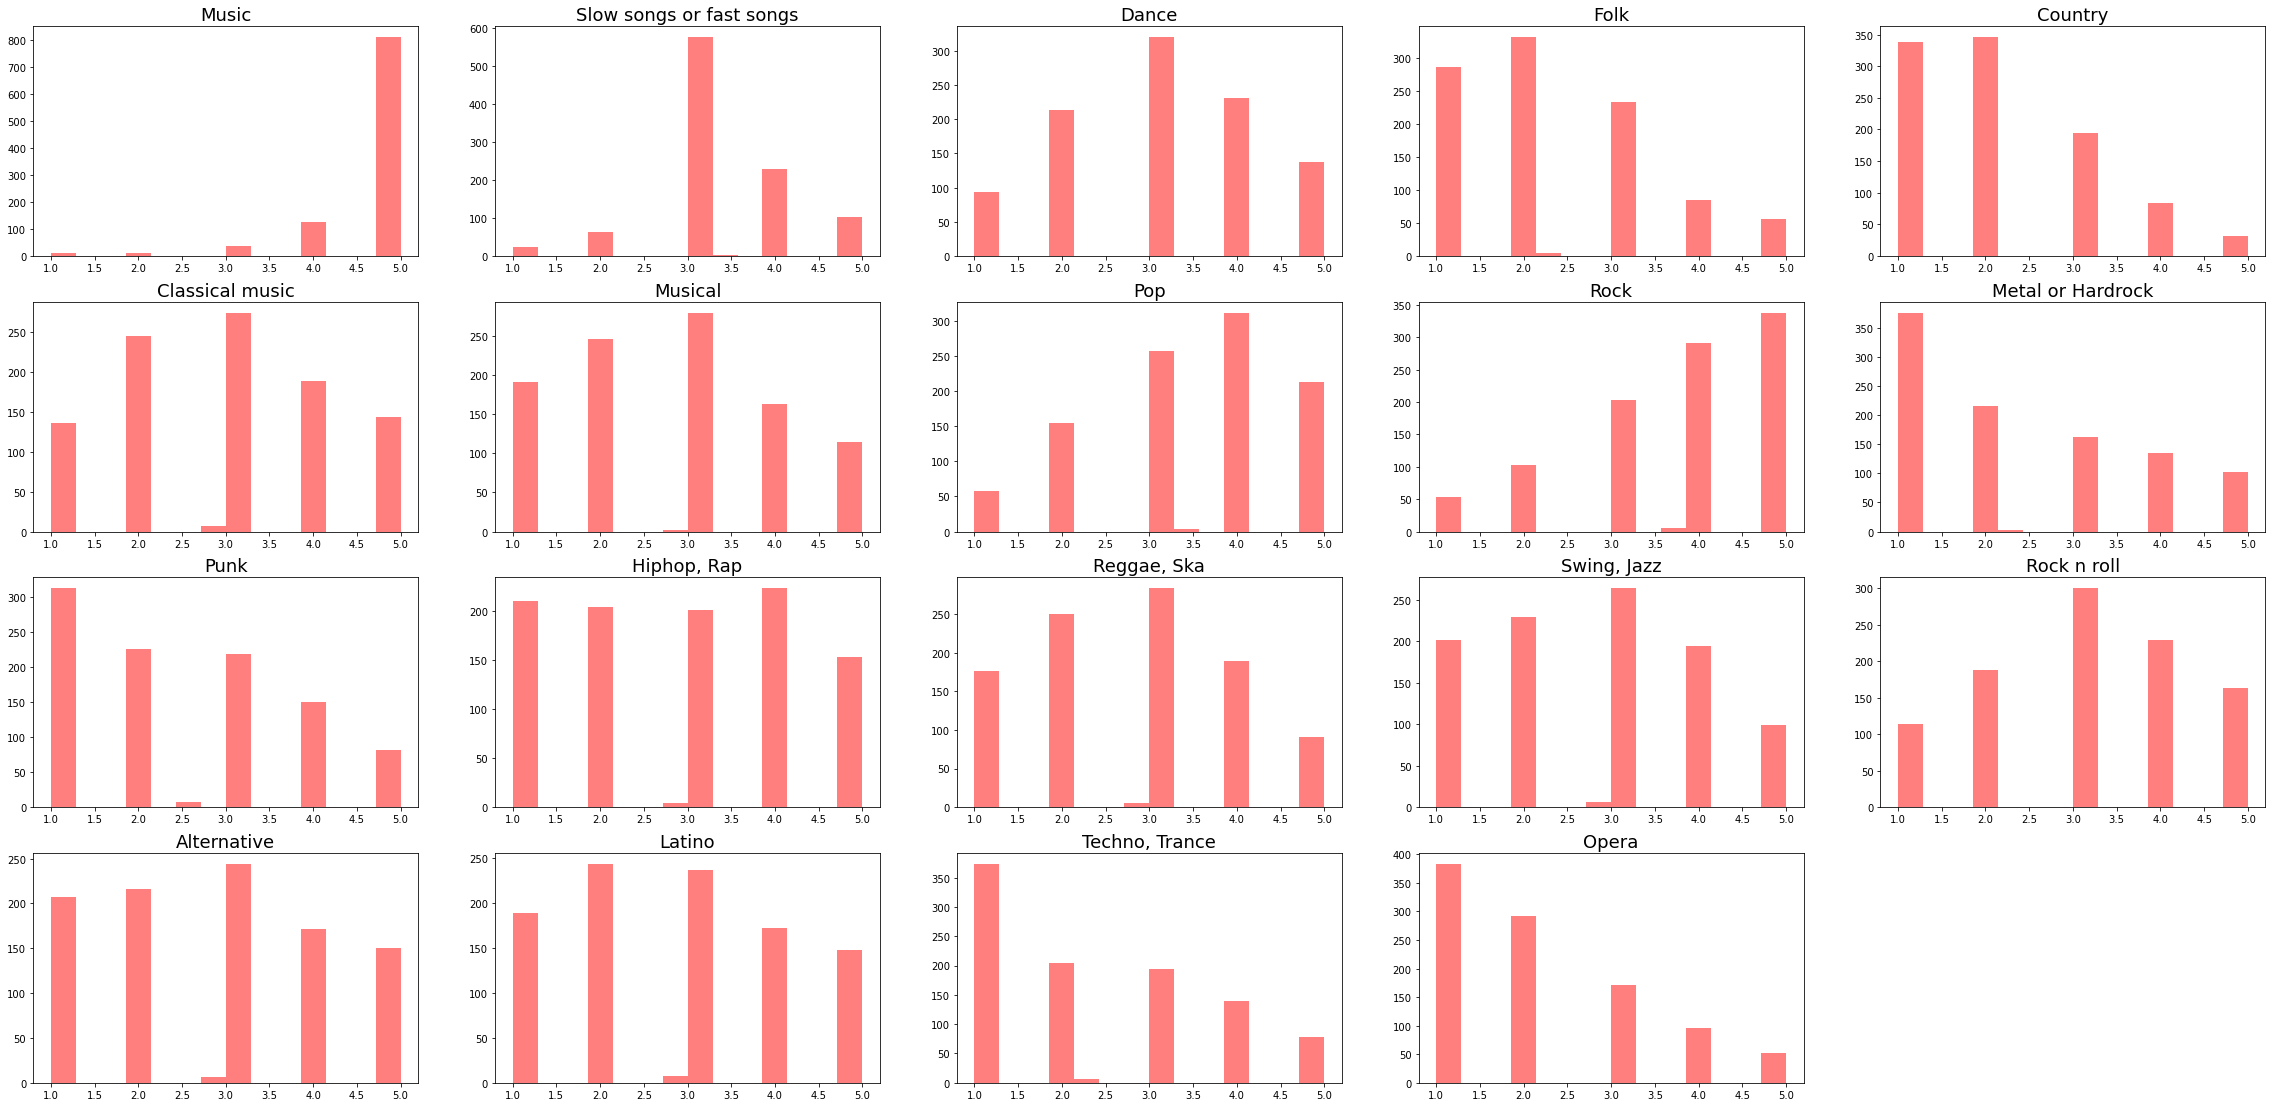

In [38]:
plt.figure(figsize=(40,60))
i = 1
for column in df_music:
    plt.subplot(12, 5, i)
    plt.hist(df_music[column], bins=14, color='red', alpha=.5)
    plt.title(column, fontsize=18)
    i += 1

#### 4.2.2. Movie preferences
We have the following distribution of movie preferences:

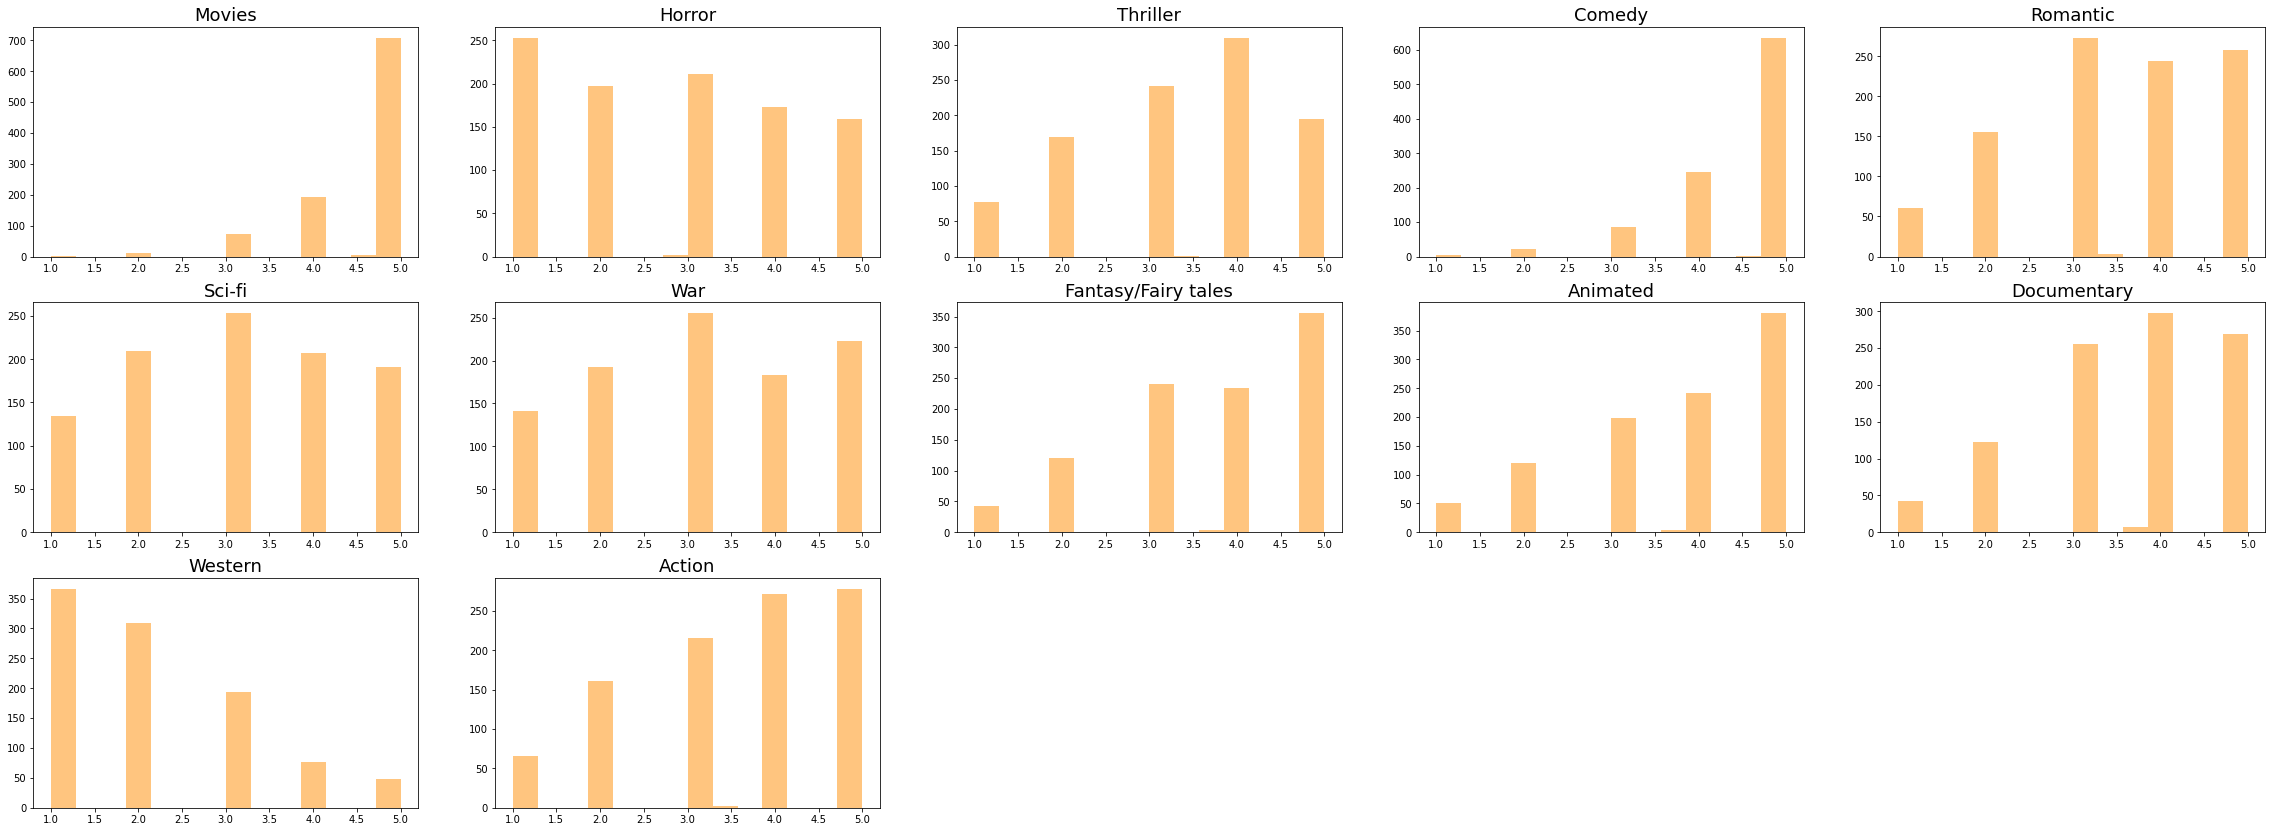

In [39]:
plt.figure(figsize=(40,60))
i = 1
for column in df_movie:
    plt.subplot(12, 5, i)
    plt.hist(df_movie[column], bins=14, color='darkorange', alpha=.5)
    plt.title(column, fontsize=18)
    i += 1

#### 4.2.3. Hobbies & interests
We have the following distribution of hobbies & interests:

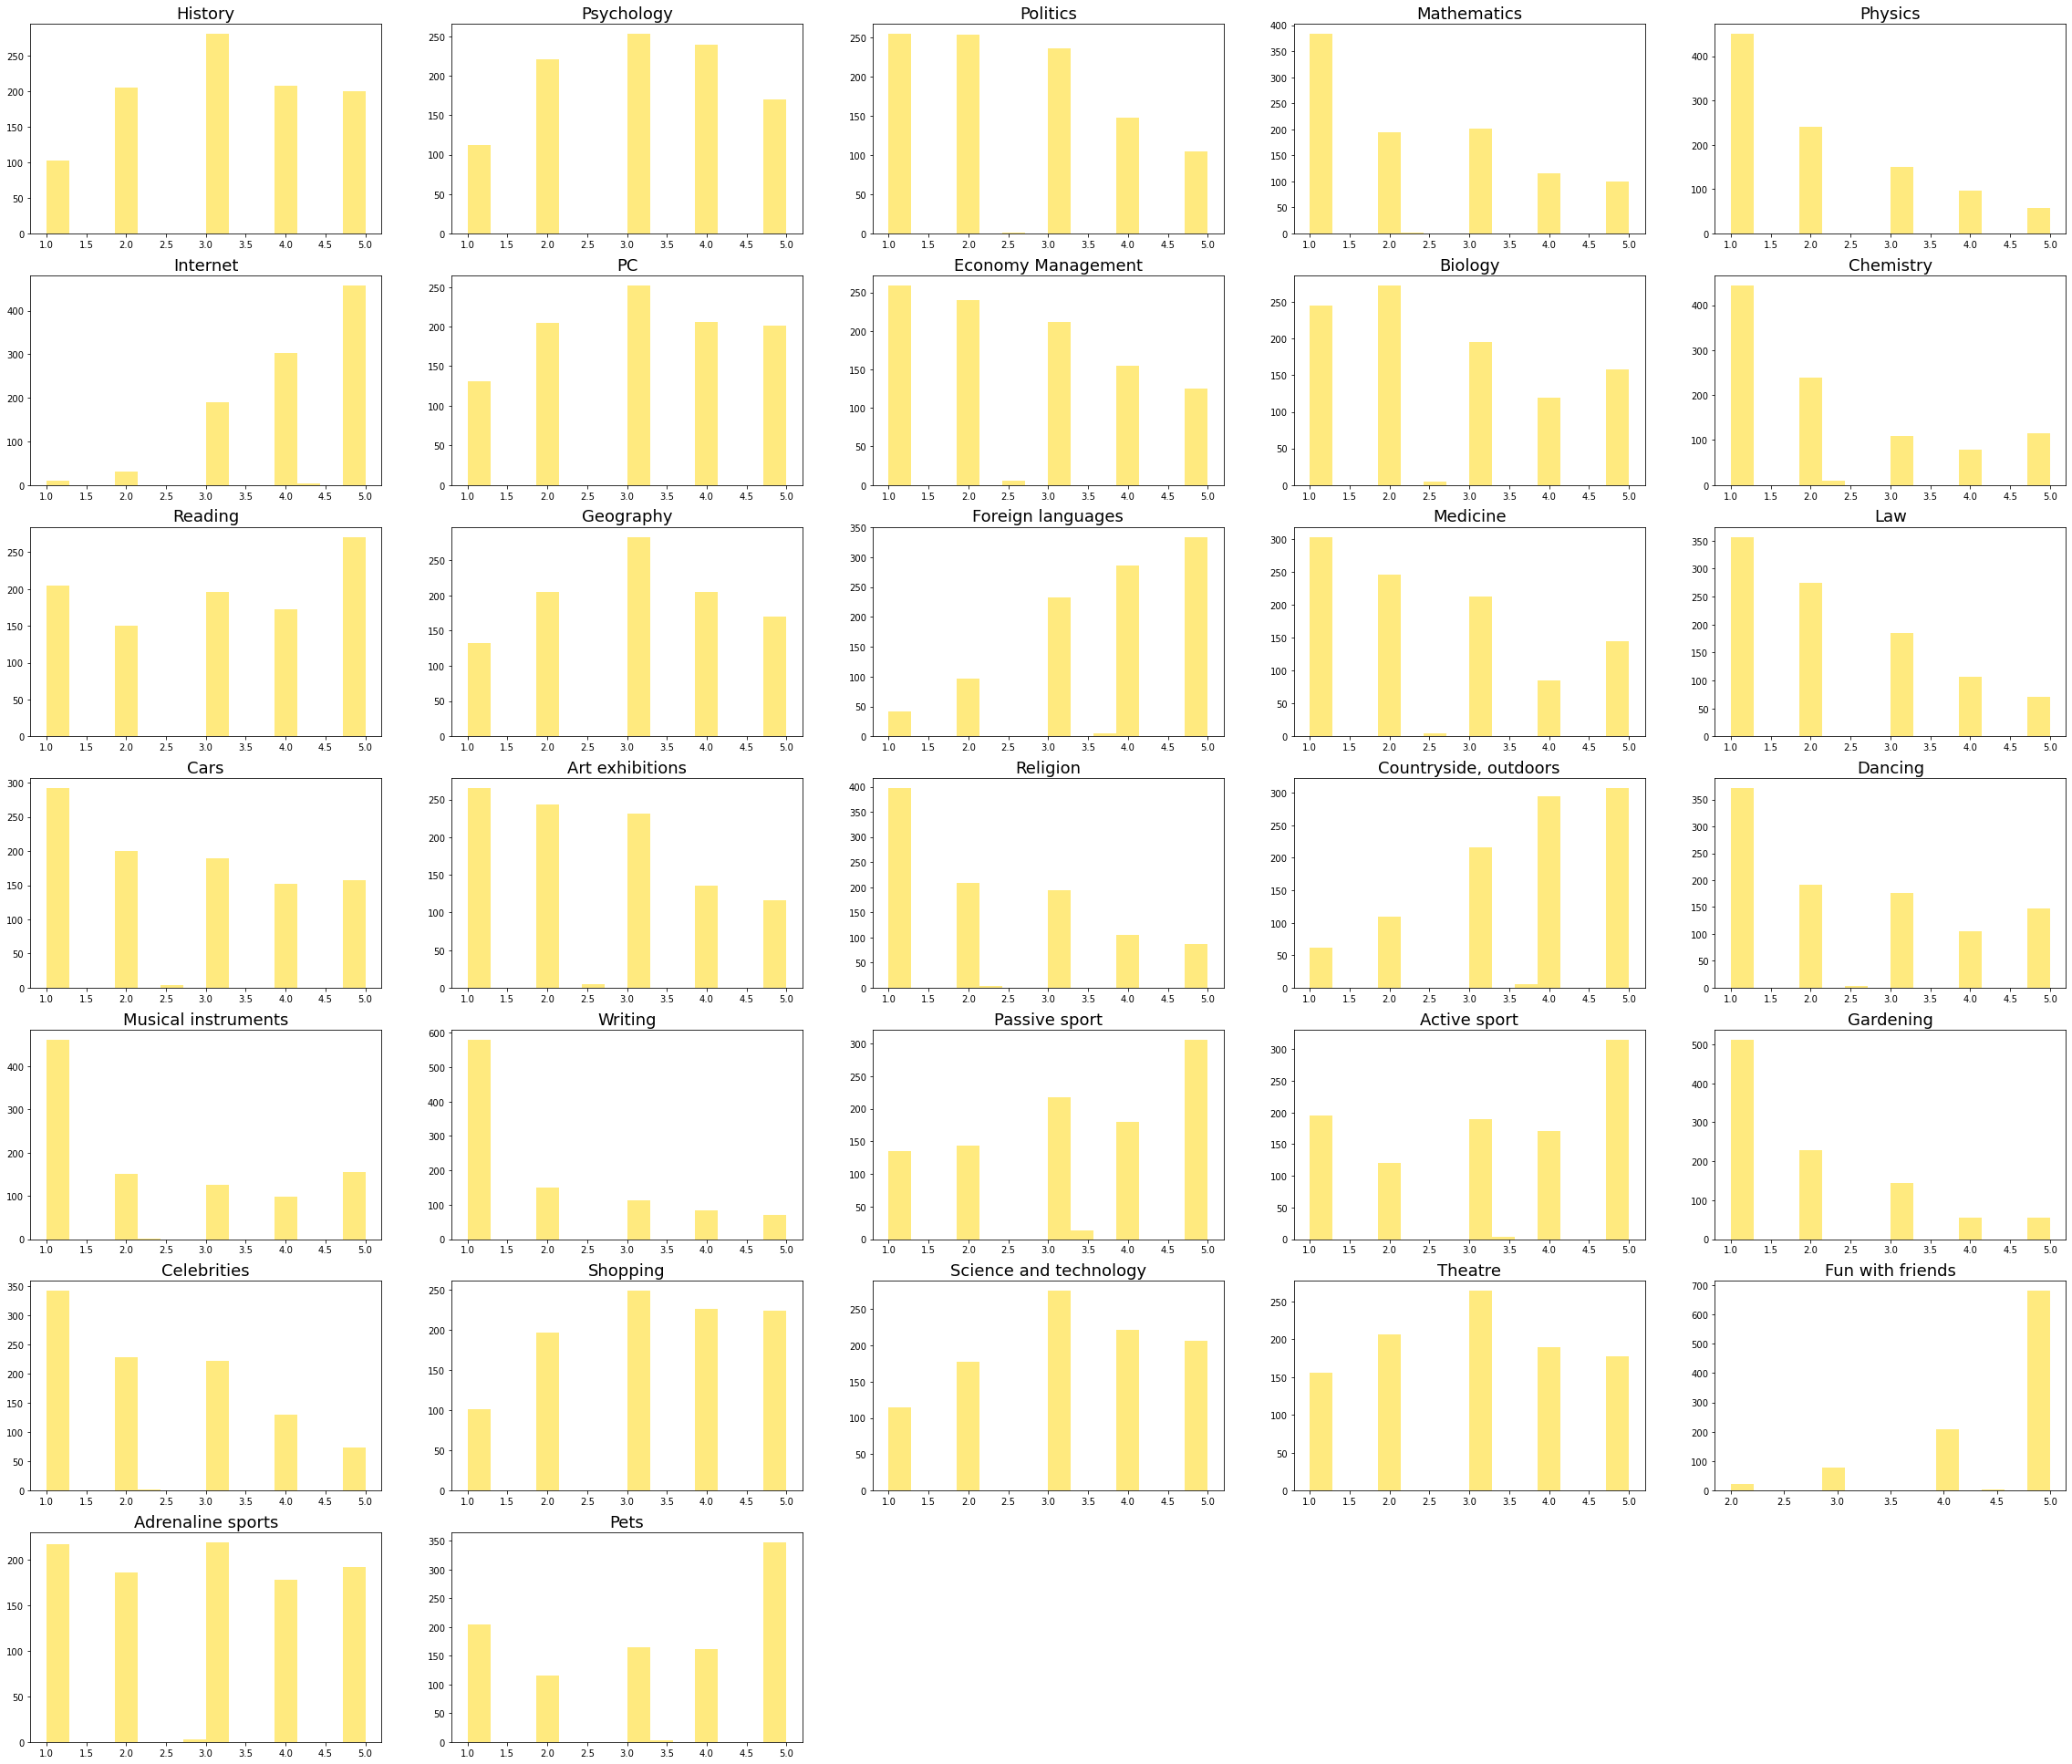

In [40]:
plt.figure(figsize=(40,60))
i = 1
for column in df_hob_int:
    plt.subplot(12, 5, i)
    plt.hist(df_hob_int[column], bins=14, color='gold', alpha=.5)
    plt.title(column, fontsize=18)
    i += 1

#### 4.2.4. Phobias
We have the following distribution of phobias:

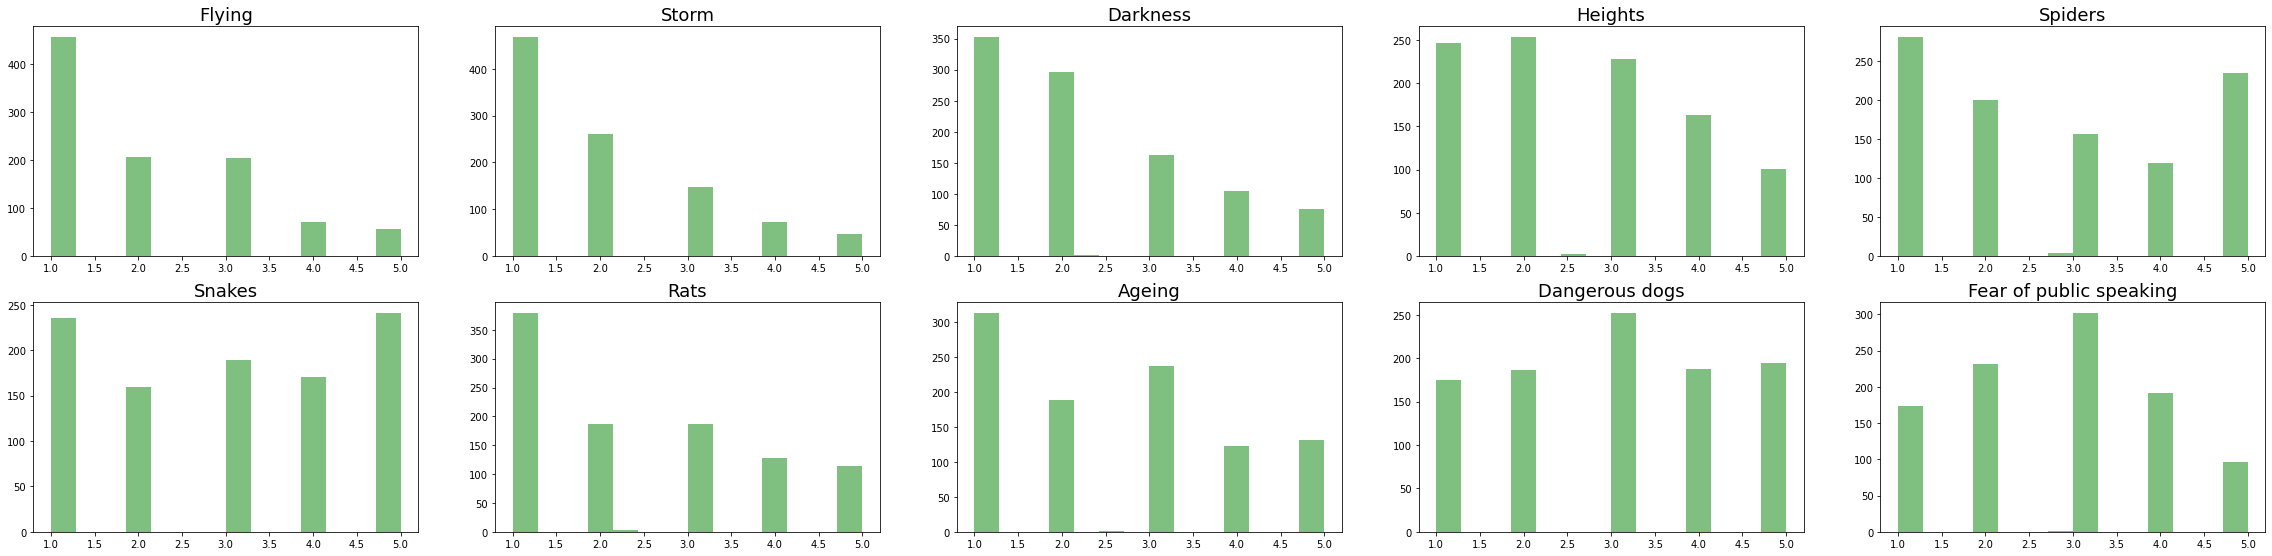

In [41]:
plt.figure(figsize=(40,60))
i = 1
for column in df_phobias:
    plt.subplot(12, 5, i)
    plt.hist(df_phobias[column], bins=14, color='green', alpha=.5)
    plt.title(column, fontsize=18)
    i += 1

#### 4.2.5. Health habits
We have the following distribution of health habits:

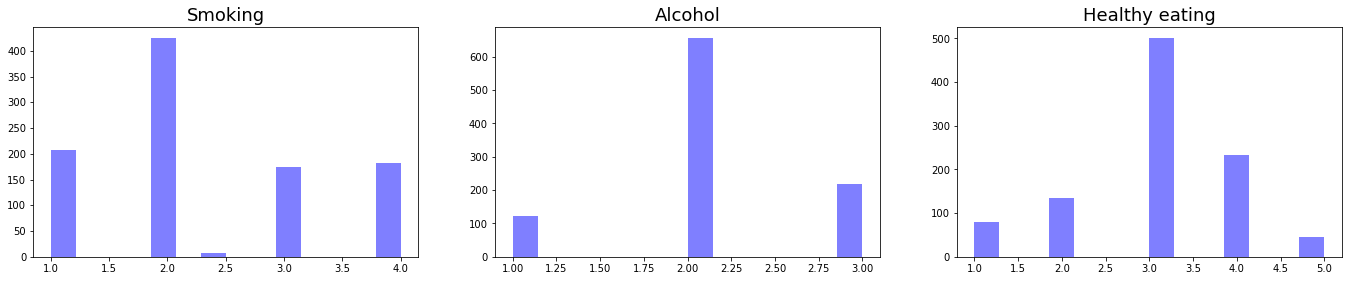

In [42]:
plt.figure(figsize=(40,60))
i = 1
for column in df_health:
    plt.subplot(12, 5, i)
    plt.hist(df_health[column], bins=14, color='blue', alpha=.5)
    plt.title(column, fontsize=18)
    i += 1

#### 4.2.6. Personality
We have the following distribution of personality:

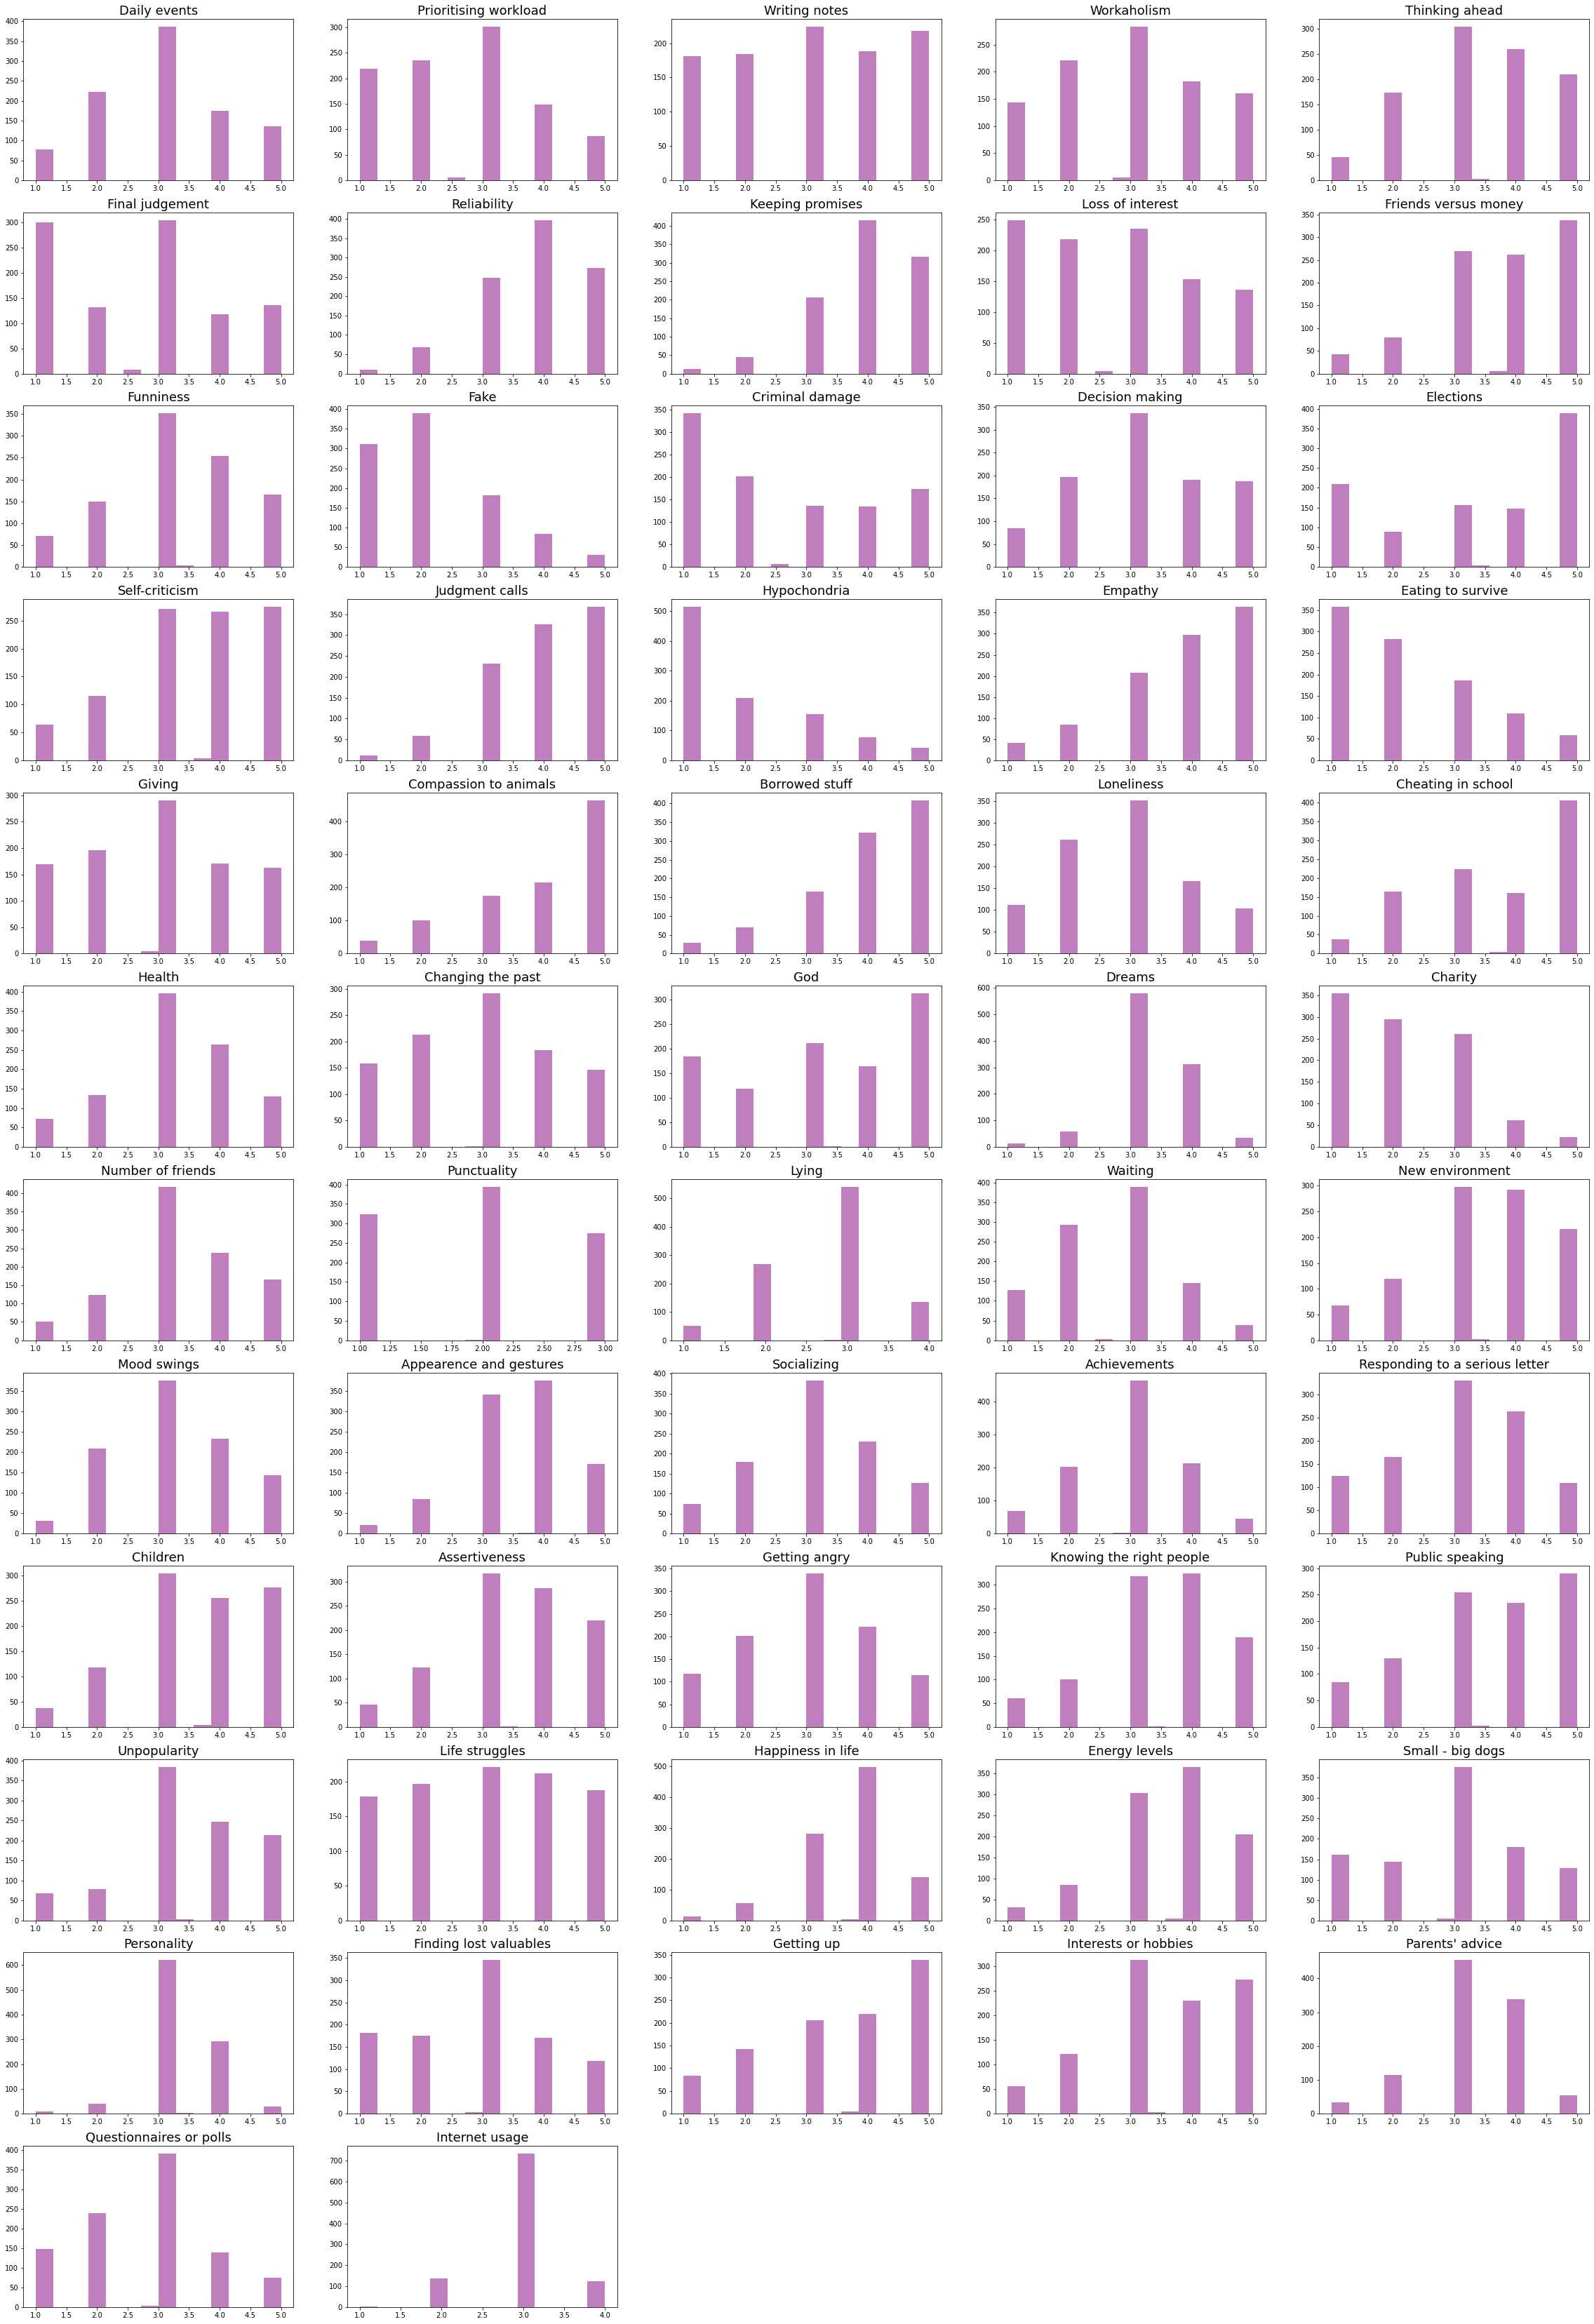

In [43]:
plt.figure(figsize=(40,60))
i = 1
for column in df_personality:
    plt.subplot(12, 5, i)
    plt.hist(df_personality[column], bins=14, color='purple', alpha=.5)
    plt.title(column, fontsize=18)
    i += 1

#### 4.2.7. Demographics
We have the following distribution of demographics:

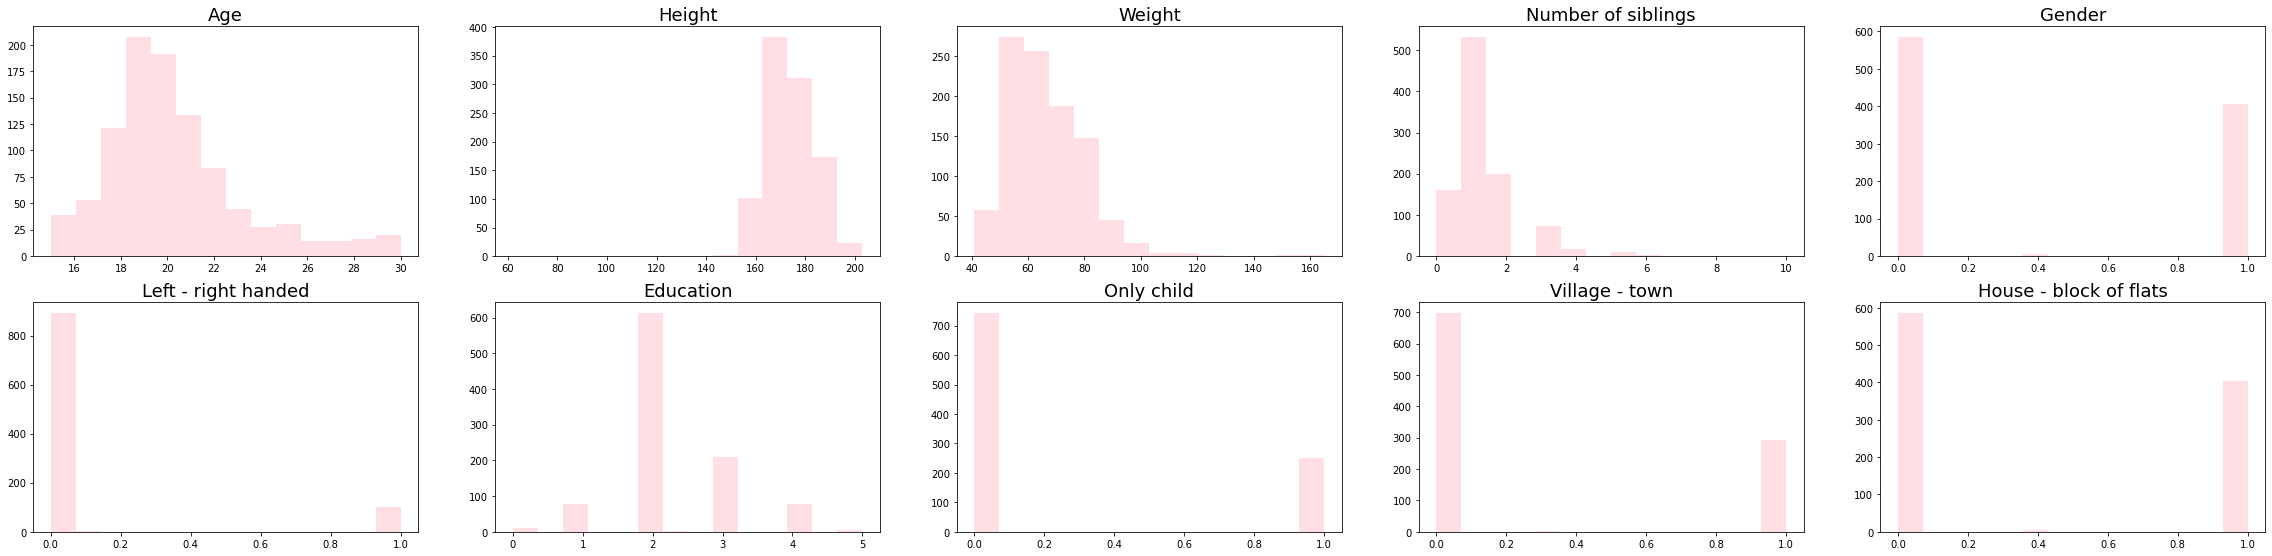

In [44]:
plt.figure(figsize=(40,60))
i = 1
for column in df_demographics:
    plt.subplot(12, 5, i)
    plt.hist(df_demographics[column], bins=14, color='pink', alpha=.5)
    plt.title(column, fontsize=18)
    i += 1

<a id='ml'></a>
## 5. Machine Learning Insights
From the work done in the previous section, we now have the following feature matrices to work with:
- X_music
- X_movie
- X_hob_int
- X_phobias
- X_health
- X_personality
- X_demographics

We now need to find a way to use these datapoints to make predictions about the spending behaviour related to the data.

In [46]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from yellowbrick.cluster import KElbowVisualizer

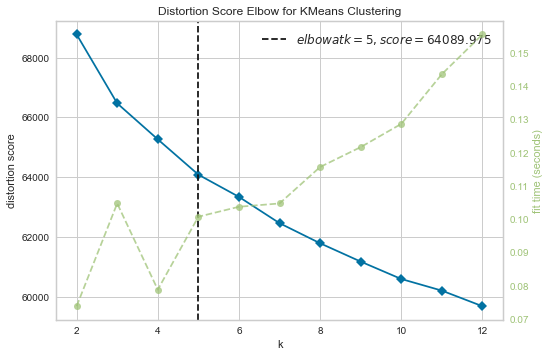

In [96]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,13))
visualizer.fit(df_personality)
visualizer.poof()

### 5.1. Spending Behaviour by Personality
We start off by clustering the particitants by their personality:

In [ ]:
# TODO: Select only columns with high variance

In [68]:
pca = PCA(n_components=2)

Text(0.5, 1.0, 'Personality Clusters after PCA')

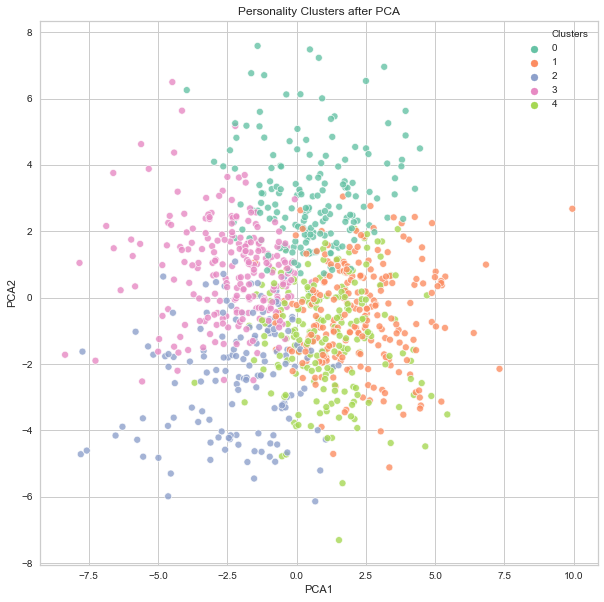

In [97]:
k = 5
X = X_personality
kmeans_pers = KMeans(n_clusters=k).fit(X)
preds = kmeans_pers.labels_
pca_fit = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = preds
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA')

In [121]:
k = 5
kmeans_pers = KMeans(n_clusters=k).fit(X_personality)
kmeans_spend = KMeans(n_clusters=k).fit(df[spending])

In [125]:
kmeans_pers.labels_[:20]

array([2, 1, 2, 0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1])

In [126]:
kmeans_spend.labels_[:20]

array([0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2])

In [130]:
spend = np.where(kmeans_spend.labels_==2, 0, kmeans_spend.labels_)
spend = np.where(kmeans_spend.labels_==0, 2, spend)

In [131]:
accuracy_score(kmeans_pers.labels_, spend)

0.4050251256281407

## Scratch Paper

In [79]:
ser_finance = df.Finances

In [80]:
ser_finance.replace([1, 2, 3], 0, inplace=True)
ser_finance.replace([4, 5], 1, inplace=True)

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [83]:
# X_music, X_hob_int, X_phobias, X_health, X_personality, X_demographics
#X_train, X_test, y_train, y_test = train_test_split(np.concatenate((X_music,
#                                                                    X_hob_int,
#                                                                    X_phobias,
#                                                                    X_health,
#                                                                    X_personality,
#                                                                    X_demographics
#                                                                    ), axis=1), ser_finance, test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X_personality, ser_finance, test_size=0.2)

# TODO: Shuffle through different combinations of these datapoints

In [94]:
model_nr = 1
clfs = [KNeighborsClassifier(), LogisticRegression(), MLPClassifier(), RandomForestClassifier(), SVC()]

parameter_space = {}
if(model_nr == 0):
    parameter_space = {'n_neighbors': [1, 5, 10]}
elif(model_nr == 1):
    parameter_space = {'C': [0.001, 0.01, 0.1, 1], 
                       'solver': ['newton-cg', 'lbfgs']}
elif(model_nr == 2):
    parameter_space = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                       'activation': ['tanh', 'relu'],
                       'solver': ['adam', 'lbfgs', 'sgd'],
                       'alpha': [0.0001, 0.05],
                       'learning_rate': ['constant','adaptive'],}
elif(model_nr == 3):
    parameter_space = {'n_estimators': [10, 50, 100, 200, 400], 
                       'criterion': ['gini', 'entropy']}
elif(model_nr == 4):
    parameter_space = {'C': [0.1, 1, 10, 100, 1000], 
                       'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                       'kernel': ['rbf', 'sigmoid']}

clf = GridSearchCV(clfs[model_nr], parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1],
                         'solver': ['newton-cg', 'lbfgs']})

In [95]:
y_pred = clf.predict(X_test)
accuracy_score(y_pred, y_test)

0.6733668341708543

In [ ]:
0.628140703517588
0.6633165829145728
0.6432160804020101
0.6633165829145728
0.6582914572864321

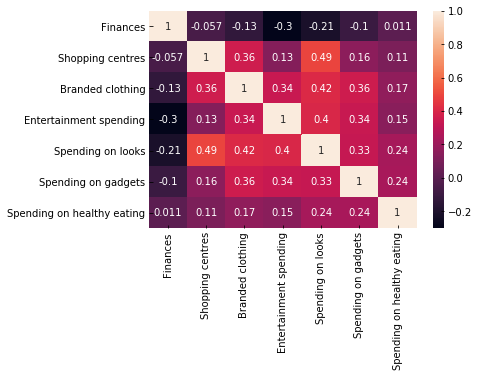

In [127]:
corr = df[spending].corr()
sns.heatmap(corr,  xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)